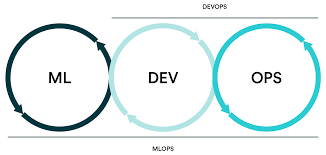

$Step-1$

**Import Required packages**

In [ ]:
!pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

$Step-2$

**Import required packages**

- Here will apply a regression analysis

- Model name: ElasticNet regression

1) Read the data

2) Perform the EDA(exploratory data analysis)

3) Divide data into train and test

4) Develop the model

5) get the performance metrics

6) Tune the model if performance is not good (hyper parameter tuning)

7) How to save all these artifacts (mlflow)

In [ ]:
import numpy as np  # numerical analysis
import pandas as pd # Data frame analysis
from sklearn.linear_model import ElasticNet  # Regression model name
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import mlflow
import mlflow.sklearn

$Step-3$

**Read the data**

In [ ]:
data=pd.read_csv('/content/winequality_red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:

#data.dropna(inplace=True)
#data.reset_index(drop=True,inplace=True)

In [ ]:
# Quality is a target variable : data has numericals so we are applying a regression
# other than quality column all other columns are consider as input data

In [ ]:
data.shape
# 1599 rows
# 12 columns

(1599, 12)

In [ ]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
data.isnull().sum()

# There is no Null values in the data

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

$Step-4$

**Model developement using MLflow**

- We divide data into two parts **train_data**  and **test_data**

- We divide train data into  **X_train** and **y_train**

- we divide test data into  **X_test** and **y_test**

- Model developent happens by **X_train** and **y_train**

- Model predictions happens by pass **X_test**, which are called **y_predictions**

- Finally we compare **y_predictions** with **y_test**

In [ ]:
# Mlflow is a cloud platform

# If you want to deploy a ML model we need to create worksapce

# this workspace is called experiment

In [ ]:
mlflow.set_experiment("mlflow/mlops_workspace")
# with this name the experiment is not there
# so it will create a new one

# If it is already existed
# whatever the developments we are doing will go under corresponding exp name

2024/06/29 06:41:27 INFO mlflow.tracking.fluent: Experiment with name 'mlflow/mlops_workspace' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///content/mlruns/935438471670373519', creation_time=1719643287820, experiment_id='935438471670373519', last_update_time=1719643287820, lifecycle_stage='active', name='mlflow/mlops_workspace', tags={}>

In [ ]:
print(mlflow.set_experiment("mlflow/mlops_workspace").experiment_id)
print(mlflow.set_experiment("mlflow/mlops_workspace").name)
print(mlflow.set_experiment("mlflow/mlops_workspace").lifecycle_stage)

935438471670373519
mlflow/mlops_workspace
active


In [ ]:
def train_model(alpha_val,l1_ratio_val):
    #============ train test split=================
    train,test=train_test_split(data,test_size=0.3,random_state=1234)
    train_x=train.drop(['quality'],axis=1) # x means only input data
    train_y=train[['quality']]             # y mean target column

    test_x= test.drop(['quality'],axis=1)
    test_y= test[['quality']]

    #============== Initiate the mlflow=======================
    with mlflow.start_run(experiment_id=935438471670373519,
                          run_name='Regression',
                          description="performing a regression analysis"):
        lr=ElasticNet(alpha=alpha_val,
                      l1_ratio=l1_ratio_val)
        lr.fit(train_x,train_y)

        #==============Model predictions=========================

        predicted_data=lr.predict(test_x)

        #=============Model evaluation==========================
        rmse=np.sqrt(mean_squared_error(test_y,predicted_data))
        mae=mean_absolute_error(test_y,predicted_data)
        r2=r2_score(test_y,predicted_data)

        #=============== log the artifacts(metrics/params/model)=======================
        mlflow.log_param("alpha",alpha_val)
        mlflow.log_param("l1_ratio",l1_ratio_val)

        mlflow.log_metric("RMSE",rmse)
        mlflow.log_metric("MAE",mae)
        mlflow.log_metric("R2",r2)

        mlflow.sklearn.log_model(lr,"model",
                                 registered_model_name="ElasticNet")










In [ ]:
train_model(0.5,0.6)  # the range is between 0 to 1

Registered model 'ElasticNet' already exists. Creating a new version of this model...
Created version '2' of model 'ElasticNet'.


In [ ]:
# If your model name is same
# It will keep on create new versions with another RUN ID

$Step-5$

**MlflowUI**

In [ ]:
!pip install pyngrok

In [ ]:
# create a tunnel
from pyngrok import ngrok
ngrok_tunnel=ngrok.connect(addr='5000',proto='http')
print("Tracking uri:",ngrok_tunnel.public_url)

ERROR:pyngrok.process.ngrok:t=2024-06-29T07:02:51+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2024-06-29T07:02:51+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2024-06-29T07:02:51+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your aut

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.

<div class="ant-col ant-col-sm-24 ant-col-lg-18 ant-col-xl-13"><h1 class="ant-typography" id="authtoken">Your Authtoken</h1><p class="text-primary mb-4 break-words _rz65p6nhEbCQ5T8181l">This is your personal Authtoken. Use this to authenticate the ngrok agent that you downloaded.</p><div class="ant-row" style="margin-left: -4px; margin-right: -4px; row-gap: 0px;"><div class="ant-col" style="padding-left: 4px; padding-right: 4px; flex: 1 1 auto;"><input class="ant-input" readonly="" type="text" value="2KVWElPAg1tzrBVnxmFFYaxfeyg_2cCYD9fH3HpMqU1u5TEsC"></div><div class="ant-col" style="padding-left: 4px; padding-right: 4px;"><button data-clipboard-text="2KVWElPAg1tzrBVnxmFFYaxfeyg_2cCYD9fH3HpMqU1u5TEsC" type="button" class="ant-btn ant-btn-primary" ant-click-animating-without-extra-node="false"><span role="img" aria-label="copy" class="anticon anticon-copy"><svg viewBox="64 64 896 896" focusable="false" data-icon="copy" width="1em" height="1em" fill="currentColor" aria-hidden="true"><path d="M832 64H296c-4.4 0-8 3.6-8 8v56c0 4.4 3.6 8 8 8h496v688c0 4.4 3.6 8 8 8h56c4.4 0 8-3.6 8-8V96c0-17.7-14.3-32-32-32zM704 192H192c-17.7 0-32 14.3-32 32v530.7c0 8.5 3.4 16.6 9.4 22.6l173.3 173.3c2.2 2.2 4.7 4 7.4 5.5v1.9h4.2c3.5 1.3 7.2 2 11 2H704c17.7 0 32-14.3 32-32V224c0-17.7-14.3-32-32-32zM382 896h-.2L232 746.2v-.2h150v150z"></path></svg></span><span>Copy</span></button></div></div></div>

In [ ]:
# Auth token is required
# 2KVWElPAg1tzrBVnxmFFYaxfeyg_2cCYD9fH3HpMqU1u5TEsC


from pyngrok import ngrok

ngrok.kill() # kill the if any existed tunnels are there
auth_token="2KVWElPAg1tzrBVnxmFFYaxfeyg_2cCYD9fH3HpMqU1u5TEsC"
ngrok.set_auth_token(auth_token)

ngrok_tunnel=ngrok.connect(addr='5000',proto='http')
print("Tracking uri:",ngrok_tunnel.public_url)

Tracking uri: https://80ec-104-196-101-203.ngrok-free.app


In [ ]:
!mlflow ui

[2024-06-29 07:12:24 +0000] [9911] [INFO] Starting gunicorn 22.0.0
[2024-06-29 07:12:24 +0000] [9911] [INFO] Listening at: http://127.0.0.1:5000 (9911)
[2024-06-29 07:12:24 +0000] [9911] [INFO] Using worker: sync
[2024-06-29 07:12:24 +0000] [9912] [INFO] Booting worker with pid: 9912
[2024-06-29 07:12:24 +0000] [9913] [INFO] Booting worker with pid: 9913
[2024-06-29 07:12:24 +0000] [9914] [INFO] Booting worker with pid: 9914
[2024-06-29 07:12:24 +0000] [9915] [INFO] Booting worker with pid: 9915
[2024-06-29 07:23:17 +0000] [9911] [INFO] Handling signal: int

Aborted!
[2024-06-29 07:23:17 +0000] [9912] [INFO] Worker exiting (pid: 9912)
[2024-06-29 07:23:17 +0000] [9915] [INFO] Worker exiting (pid: 9915)
[2024-06-29 07:23:17 +0000] [9914] [INFO] Worker exiting (pid: 9914)
[2024-06-29 07:23:17 +0000] [9913] [INFO] Worker exiting (pid: 9913)
[2024-06-29 07:23:18 +0000] [9911] [INFO] Shutting down: Master


In [ ]:
train,test=train_test_split(data,test_size=0.3,random_state=1234)
train_x=train.drop(['quality'],axis=1) # x means only input data
train_y=train[['quality']]             # y mean target column

test_x= test.drop(['quality'],axis=1)
test_y= test[['quality']]

- Copy the pandas predictions code from mlflow UI

- It is there under regression under artifacts

- Then change the data as test_x

In [ ]:
import mlflow
logged_model = 'runs:/152448a1368147d4b798e22975ad7ec7/model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
import pandas as pd
loaded_model.predict(pd.DataFrame(test_x))

array([5.7350397 , 5.69391479, 5.66275688, 5.78102141, 5.81499836,
       5.5898468 , 5.78768463, 5.81579119, 5.7171204 , 5.77880703,
       5.3504325 , 5.53154074, 5.75040339, 5.71393757, 5.71409162,
       5.51150692, 5.12901423, 5.6217534 , 5.64897881, 5.19646186,
       5.11162383, 5.63915485, 5.54144197, 5.74144952, 5.7435199 ,
       5.71547907, 5.6084159 , 5.2069246 , 5.56390947, 5.75482012,
       5.29487972, 5.81928263, 5.37456338, 5.70673444, 5.5834149 ,
       5.4395437 , 5.83148557, 5.54654115, 5.65100555, 5.85223544,
       5.46890626, 5.78170433, 5.68862798, 5.63101587, 5.43666901,
       5.3796736 , 5.08944237, 5.81563715, 5.41369423, 5.53495489,
       5.42259389, 5.76019476, 5.82377612, 5.72908099, 5.728101  ,
       5.70982944, 5.84642023, 5.70231821, 5.77834489, 5.65923281,
       5.73492931, 5.1962305 , 5.30043048, 5.69323187, 5.35255805,
       5.74954435, 5.70102962, 5.78260707, 5.41133778, 5.7708778 ,
       5.82747678, 5.76806927, 5.60906573, 5.82810453, 5.20692